In [1]:
import torch
import torch.nn.functional as F
import random

import matplotlib.pyplot as plt
%matplotlib inline

***test  ***

In [2]:
#import source data
words = open('./names.txt','r').read().splitlines()
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [3]:
len(words)

32033

In [4]:
i , j =list(enumerate(words[:1]))[0]
# i  , j

In [5]:
#creat a number to string dic
chars = sorted(list(set(''.join(words))))
chars = ['.'] + chars
# chars
itos = {i : j for i , j in enumerate(chars)}
# itos

In [6]:
#stoi
stoi = {j : i for i ,j in itos.items()}
# stoi

In [7]:
X , Y = [] , []

In [8]:
#dataset(train   dev  test)
contextNum = 3
for word in words[:5] :
    SlidingWindow = contextNum * [0]
    for char in word + '.' :
        yi = stoi[char]
        X.append(SlidingWindow)
        Y.append(yi)
        # print(''.join( itos[i] for i in SlidingWindow) + "    ---->    " + char)
        SlidingWindow = SlidingWindow[1:] + [yi]

X = torch.tensor(X)
Y = torch.tensor(Y)                


In [9]:
X ,  X.shape   ,X.dtype

(tensor([[ 0,  0,  0],
         [ 0,  0,  5],
         [ 0,  5, 13],
         [ 5, 13, 13],
         [13, 13,  1],
         [ 0,  0,  0],
         [ 0,  0, 15],
         [ 0, 15, 12],
         [15, 12,  9],
         [12,  9, 22],
         [ 9, 22,  9],
         [22,  9,  1],
         [ 0,  0,  0],
         [ 0,  0,  1],
         [ 0,  1, 22],
         [ 1, 22,  1],
         [ 0,  0,  0],
         [ 0,  0,  9],
         [ 0,  9, 19],
         [ 9, 19,  1],
         [19,  1,  2],
         [ 1,  2,  5],
         [ 2,  5, 12],
         [ 5, 12, 12],
         [12, 12,  1],
         [ 0,  0,  0],
         [ 0,  0, 19],
         [ 0, 19, 15],
         [19, 15, 16],
         [15, 16,  8],
         [16,  8,  9],
         [ 8,  9,  1]]),
 torch.Size([32, 3]),
 torch.int64)

In [10]:
Y , Y.shape ,Y.dtype

(tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
          1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0]),
 torch.Size([32]),
 torch.int64)

In [11]:
#embedding table
C = torch.randn((27,2))
# C
emb = C[X]
emb.shape
# plt.plot(torch.arange(27),C)

torch.Size([32, 3, 2])

In [12]:
#parameters init
g = torch.Generator().manual_seed(2147483647) 
W1 = torch.randn(6,100, generator=g)
b1   = torch.randn(100, generator=g)
W2 = torch.randn((100,27), generator=g)
b2 = torch.randn(27, generator=g)
Parameters = [W1,b1,W2,b2,C]

In [13]:
for p in Parameters:
    p.requires_grad = True

In [14]:
lossi =[]
iterration = []

In [15]:
#forward  and back  propagation
for i in range(100):
    emb = C[X]
    h = torch.tanh(emb.view(-1,6)@W1 + b1)
    logits = h@W2 +b2
    loss = F.cross_entropy(logits,Y)
    for p in Parameters:
        p.grad = None
    loss.backward()

    for p in Parameters:
        p.data  += -0.1*p.grad
    lossi.append(loss.item())
    iterration.append(i)
    
print(loss.item())

0.34229281544685364


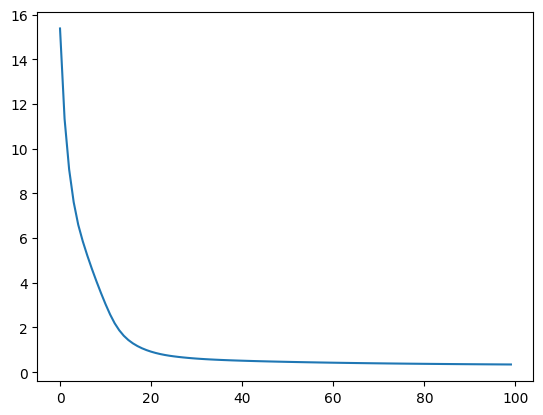

In [16]:
plt.plot(iterration,lossi)

In [17]:
torch.randint(Y.shape[0],(32,),generator=g)

tensor([28, 14,  5, 25, 23, 14,  6, 17, 21, 18, 20, 29, 10, 10, 19,  7, 28, 11,
        30,  6,  4, 20, 16, 10, 31, 25,  2, 24, 17, 28,  3,  5])

In [18]:
sum(p.nelement() for p in Parameters)

3481

***batch***

In [19]:
#forward  and back  propagation   BATCH
for i in range(100):
    batchi = torch.randint(Y.shape[0],(32,),generator=g)
    emb = C[X[batchi]] #X[batch] (32,3) embedding just like extends two dims
    h = torch.tanh(emb.view(-1,6)@W1 + b1)
    logits = h@W2 +b2
    loss = F.cross_entropy(logits,Y[batchi])
    for p in Parameters:
        p.grad = None
    loss.backward()

    for p in Parameters:
        p.data  += -0.03*p.grad
    lossi.append(loss.item())
    iterration.append(i)
    
print(loss.item())

0.3181654214859009


In [20]:
logits,Y

(tensor([[ 1.2806e+01,  6.1096e+00,  7.1055e+00, -5.6946e+00, -1.0387e+01,
           1.4033e+00, -2.7661e+00, -6.1172e+00, -2.7983e+00,  4.2328e+00,
          -3.5294e-01, -1.8667e+00,  4.6223e+00, -1.3134e+01,  1.3246e+00,
           2.2001e+00,  3.2483e-01, -2.3366e+00, -1.7521e+01,  5.0455e+00,
           6.9310e+00,  6.6470e-01,  6.5508e+00, -3.4081e+00, -1.5140e+00,
          -5.4888e+00, -3.9281e+00],
         [ 1.6084e+00,  8.8337e+00,  7.8723e+00, -5.5220e+00, -1.1051e+01,
           6.4762e+00, -4.2332e+00, -2.0638e+00, -6.0371e+00,  1.4353e+01,
           2.3087e+00, -1.1834e-01,  3.5997e+00, -6.9857e+00, -1.6586e+00,
          -1.6200e+00,  9.2450e+00, -4.0817e+00, -5.3516e+00,  2.5796e+00,
          -5.7206e+00, -4.4654e+00, -4.6254e+00, -4.1690e+00,  3.4643e+00,
           3.8053e+00, -1.1285e+01],
         [-5.7553e+00,  4.6105e+00, -3.6598e+00, -8.4967e+00, -5.2850e+00,
           3.8646e+00, -4.4236e+00, -6.0987e-01, -7.5793e+00,  4.7317e+00,
          -9.1632e+00, -5.

**learning rate  pick**

In [21]:
#paragram init
g = torch.Generator().manual_seed(2147483647) 
W1 = torch.randn(6,100, generator=g)
b1   = torch.randn(100, generator=g)
W2 = torch.randn((100,27), generator=g)
b2 = torch.randn(27, generator=g)
Parameters = [W1,b1,W2,b2,C]

In [22]:
for p in Parameters:
    p.requires_grad = True

In [23]:
#learning sapce
lre  = torch.linspace(-3,0,1000)
lrs = 10**lre
lrs


tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [24]:
#forward  and back  propagation   BATCH
lossi = []
for i in range(1000):
    batchi = torch.randint(Y.shape[0],(32,),generator=g)
    emb = C[X[batchi]] #X[batch] (32,3) embedding just like extends two dims
    h = torch.tanh(emb.view(-1,6)@W1 + b1)
    logits = h@W2 +b2
    loss = F.cross_entropy(logits,Y[batchi])
    for p in Parameters:
        p.grad = None
    loss.backward()

    lr  = lrs[i] 
    for p in Parameters:
        p.data  += -0.01*p.grad
    lossi.append(loss.item())
    iterration.append(i)
    
    
print(loss.item())

0.2553366720676422


Text(0, 0.5, 'loss')

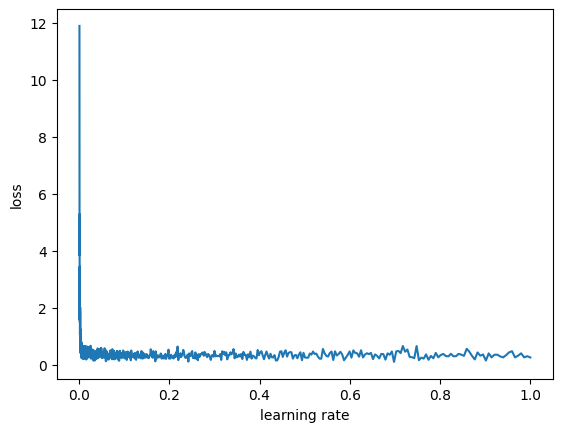

In [25]:
plt.plot(lrs,lossi)
plt.xlabel("learning rate")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

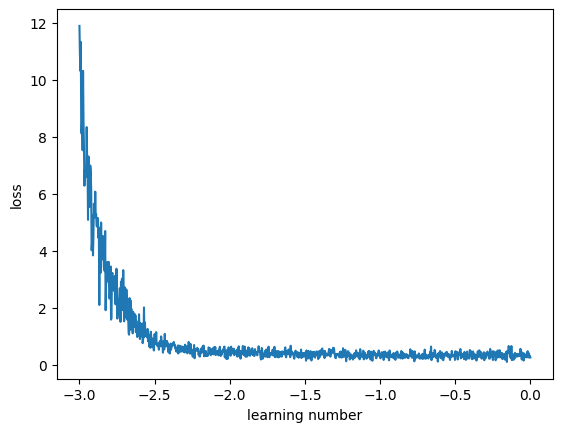

In [26]:
plt.plot(lre,lossi)
plt.xlabel("learning number")
plt.ylabel("loss")

In [27]:
#dataset splict (train  dev test)
def split_dataset(words):
    X,Y = [ ] , [ ]
    contextNum = 3
    for word in words :
        SlidingWindow = contextNum * [0]
        for char in word + '.' :
            yi = stoi[char]
            X.append(SlidingWindow)
            Y.append(yi)
            # print(''.join( itos[i] for i in SlidingWindow) + "    ---->    " + char)
            SlidingWindow = SlidingWindow[1:] + [yi]

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape,Y.shape)
    return X , Y                



In [28]:
random.seed(42)
random.shuffle(words)
n1 = int (0.8*(len(words)))
n2 = int (0.9*(len(words)))
n1,n2

(25626, 28829)

In [29]:
Xtrain , Ytrain = split_dataset(words[:n1])
Xdev , Ydev = split_dataset(words[n1:n2])
Xte , Yte = split_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


***evaluate***

In [30]:
sum(p.nelement() for p in Parameters) # number of parameters in total

3481

In [31]:
#forward  and back  propagation   BATCH
for i in range(10000):
    batchi = torch.randint(Ytrain.shape[0],(32,),generator=g)
    emb = C[Xtrain[batchi]] #X[batch] (32,3) embedding just like extends two dims
    h = torch.tanh(emb.view(-1,6)@W1 + b1)
    logits = h@W2 +b2
    loss = F.cross_entropy(logits,Ytrain[batchi])
    for p in Parameters:
        p.grad = None
    loss.backward()

    for p in Parameters:
        p.data  += -0.01*p.grad
    lossi.append(loss.item())
    iterration.append(i)
    
print(loss.item())

2.3684158325195312


In [32]:
#train ev
emb = C[Xtrain] #X[batch] (32,3) embedding just like extends two dims
h = torch.tanh(emb.view(-1,6)@W1 + b1)
logits = h@W2 +b2
loss = F.cross_entropy(logits,Ytrain)
print(loss.item())

2.5497775077819824


In [ ]:
#dev
emb = C[Xdev] 
h = torch.tanh(emb.view(-1,6)@W1 + b1)
logits = h@W2 +b2
loss = F.cross_entropy(logits,Ydev)
print(loss.item())

2.5418081283569336


In [34]:
#test
emb = C[Xte] 
h = torch.tanh(emb.view(-1,6)@W1 + b1)
logits = h@W2 +b2
loss = F.cross_entropy(logits,Yte)
print(loss.item())

2.5481231212615967


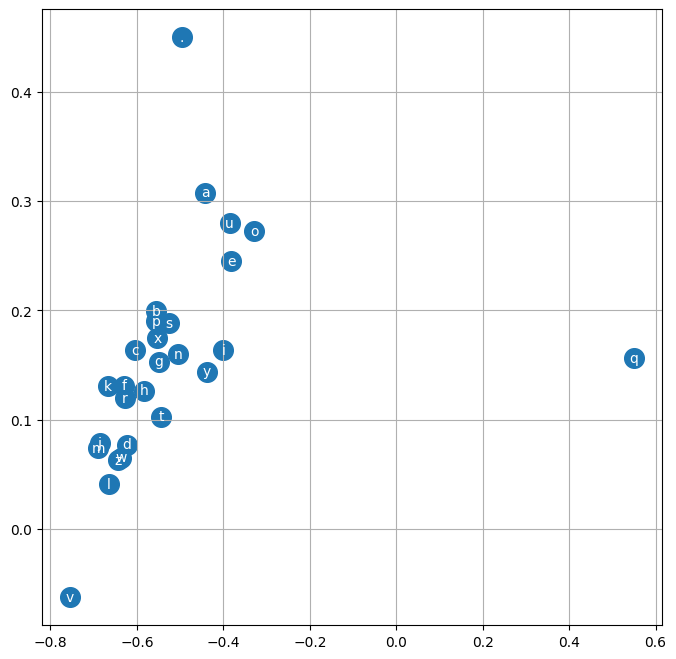

In [35]:
plt.figure(figsize = (8,8))
plt.scatter(C[:,0].data, C[:,1].data, s = 200)

for i in range(C.shape[0]):
    plt.text(C[i,0].item(),C[i,1].item(), itos[i], ha = "center", va = "center", color= "white")
plt.grid('minor')

***Change Hyperparameters***

In [41]:
#parameters init
g = torch.Generator().manual_seed(2147483647) 
C = torch.randn((27, 10), generator=g)
W1 = torch.randn(30,200, generator=g)
b1   = torch.randn(200, generator=g)
W2 = torch.randn((200,27), generator=g)
b2 = torch.randn(27, generator=g)
Parameters = [W1,b1,W2,b2,C]

In [43]:
sum(p.nelement() for p in Parameters) # number of parameters in total

11897

In [44]:
for p in Parameters:
    p.requires_grad = True

In [71]:
#forward  and back  propagation   BATCH
for i in range(10000):
    batchi = torch.randint(Ytrain.shape[0],(32,),generator=g)
    emb = C[Xtrain[batchi]] #X[batch] (32,3) embedding just like extends two dims
    h = torch.tanh(emb.view(-1,30)@W1 + b1)
    logits = h@W2 +b2
    loss = F.cross_entropy(logits,Ytrain[batchi])
    for p in Parameters:
        p.grad = None
    loss.backward()

    for p in Parameters:
        p.data  += -0.01*p.grad
    lossi.append(loss.item())
    iterration.append(i)
    
print(loss.item())

2.2219552993774414


In [72]:
#train ev
emb = C[Xtrain] 
h = torch.tanh(emb.view(-1,30)@W1 + b1)
logits = h@W2 +b2
loss = F.cross_entropy(logits,Ytrain)
print(loss.item())

2.6234211921691895


In [73]:
#dev
emb = C[Xdev] 
h = torch.tanh(emb.view(-1,30)@W1 + b1)
logits = h@W2 +b2
loss = F.cross_entropy(logits,Ydev)
print(loss.item())

2.6369588375091553


In [62]:
#test
emb = C[Xte] 
h = torch.tanh(emb.view(-1,30)@W1 + b1)
logits = h@W2 +b2
loss = F.cross_entropy(logits,Yte)
print(loss.item())

2.923823595046997


***sample***

In [74]:
#sample
context = [0] * contextNum
C[torch.tensor([context])].shape

torch.Size([1, 3, 10])

In [75]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)
for _ in range(20):
    context = contextNum * [0]
    out =[]
    while 1 :
        h = torch.tanh(C[torch.tensor(context)].view(1,-1)@W1 +b1)
        logits = h@W2 + b2
        probs = F.softmax(logits,dim=1)
        ix = torch.multinomial(probs,1,generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break

    print(''.join(itos[i] for i in out ))    

mona.
maya.
zheel.
ndyryal.
remerstendraj.
cadseedon.
iihely.
jenleiela.
ananareelye.
malaia.
noshdanrishimies.
kin.
roneliranthonanu.
zence.
ruy.
julieha.
kaysa.
sakyan.
hil.
sakylisun.
